# Overview

In today's lecture we will introduce some of the basic Linear Multistep
Methods (LMMs) for initial value problems (IVP). These notes are based
largely on the book by Randall LeVeque entitled *Finite Difference
Methods for Ordinary and Partial Differential Equations* (SIAM,
Philadelphia, PA, 2007), Chapters 5-7.

Some complementary lectures are:

-   Chapter 8, K. Atkinson. Elementary Numerical Analysis. Wiley. 2003

-   Chapter 5, R. L. Burden, J. D. Faires. Numerical Analysis.
    Brooks/Cole. 2010

-   Chapter 16, Uri M. Ascher, Chen Greif. A First Course on Numerical
    Methods. SIAM. 2011

---

# Linear Multistep Methods

Linear multistep methods make use of computations from previous time
steps to achieve higher order accuracy. The general form of an *$r$-step
linear multistep method* is given by

$$
\sum_{j=0}^r \alpha_j U^{n+j} = k \sum_{j=0}^r \beta_j f (U^{n+j}, t_{n+j}).
$$

In this form, we see that the update $U^{n+r}$ is computed from previous
values $U^{n+r-1}$, $U^{n+r-2}$, $\dots$, $U^n$ and $f$ evaluated at
these previous values.

If $\beta_r = 0$, the linear multistep method is explicit. Otherwise, it
is implicit. For convention, $\alpha_r = 1$ is chosen. By additional
choices, we obtain families of linear multistep methods. Linear
multistep methods typically come in families. The most popular for
nonstiff problems is the *Adams family* and the most popular for stiff
problems is the *BDF family*.

## Adams Methods

Adams methods have the general form
$$
U^{n+r} = U^{n+r-1} + k \sum_{j=0}^r \beta_j f(U^{n+j}, t_{n+j}).
$$
Specifically, the parameters are
$$
\alpha_r = 1, \quad \alpha_{r-1} = -1, \quad \alpha_j = 0 \text{ for } j < r-1,
$$
and the $\beta_j$ coefficients are chosen to optimize the order of accuracy.

### Adams-Bashforth Methods

Explicit Adams methods (where $\beta_r = 0$) are called *Adams-Bashforth methods*.  
There are $r$ coefficients $\beta_0, \dots, \beta_{r-1}$. An $r$-step Adams-Bashforth method is of order $r$.

Alternatively, these methods can be derived from the integral form
$$
u(t_{n+1}) = u(t_n) + \int_{t_n}^{t_{n+1}} f(u(t), t) \, dt,
$$
by interpolating $f(u(t), t)$ with a polynomial of degree $r-1$ at $t_n, \dots, t_{n+r-1}$ and then integrating the polynomial.

Some examples (using $F^n = f(U^n, t_n)$):

- **1-step:** $U^{n+1} = U^n + k F^n$ (Forward Euler)  
- **2-step:** $U^{n+2} = U^{n+1} + \frac{k}{2} (-F^n + 3 F^{n+1})$  
- **3-step:** $U^{n+3} = U^{n+2} + \frac{k}{12} (5 F^n - 16 F^{n+1} + 23 F^{n+2})$  
- **4-step:** $U^{n+4} = U^{n+3} + \frac{k}{24} (-9 F^n + 37 F^{n+1} - 59 F^{n+2} + 55 F^{n+3})$  

### Adams-Moulton Methods

Implicit Adams methods (with $\beta_r \neq 0$) are called *Adams-Moulton methods*.  
Here, using the integral form, $f(u(t),t)$ is approximated by a polynomial of degree $r$ at $t_n, \dots, t_{n+r}$, giving order $r+1$.  

Examples:

- **1-step:** $U^{n+1} = U^n + \frac{k}{2}(F^n + F^{n+1})$ (Trapezoidal)  
- **2-step:** $U^{n+2} = U^{n+1} + \frac{k}{12}(-F^n + 8 F^{n+1} + 5 F^{n+2})$  
- **3-step:** $U^{n+3} = U^{n+2} + \frac{k}{24}(F^n - 5 F^{n+1} + 19 F^{n+2} + 9 F^{n+3})$  
- **4-step:** $U^{n+4} = U^{n+3} + \frac{k}{720}(-19 F^n + 106 F^{n+1} - 264 F^{n+2} + 646 F^{n+3} + 251 F^{n+4})$  

## Backward Differentiation Formulas (BDF)

BDF methods are derived by differentiating the interpolating polynomial through past solution points and setting the derivative at $t_{n+r}$ to $f(U^{n+r}, t_{n+r})$.  
The general $r$-step BDF method (order $r$) is:
$$
\sum_{j=0}^r \alpha_j U^{n+j} = k \beta_r f(U^{n+r}, t_{n+r}).
$$
These methods are implicit. Examples:

- **1-step:** $U^{n+1} - U^n = k F^{n+1}$ (Backward Euler)  
- **2-step:** $3 U^{n+2} - 4 U^{n+1} + U^n = 2 k F^{n+2}$  
- **3-step:** $11 U^{n+3} - 18 U^{n+2} + 9 U^{n+1} - 2 U^n = 6 k F^{n+3}$  

--- 

## Local Truncation Error

For any linear multistep method, the local truncation error is
$$
\tau(t_{n+r}) = \frac{1}{k} \left[ \sum_{j=0}^r \alpha_j u(t_{n+j}) - k \sum_{j=0}^r \beta_j u'(t_{n+j}) \right].
$$

Expanding $u(t_{n+j})$ and $u'(t_{n+j})$ in Taylor series:
$$
\begin{aligned}
u(t_{n+j}) &= u(t_n) + j k u'(t_n) + \frac{(j k)^2}{2} u''(t_n) + \dots,\\
u'(t_{n+j}) &= u'(t_n) + j k u''(t_n) + \frac{(j k)^2}{2} u'''(t_n) + \dots
\end{aligned}
$$

Substituting into $\tau(t_{n+r})$ yields
$$
\begin{aligned}
\tau(t_{n+r}) &= \frac{1}{k} \Big[ \sum_{j=0}^r \alpha_j \Big] u(t_n) + \Big[ \sum_{j=0}^r (j \alpha_j - \beta_j) \Big] u'(t_n) \\
& \quad + k \Big[ \sum_{j=0}^r \Big( \frac{1}{2} j^2 \alpha_j - j \beta_j \Big) \Big] u''(t_n) + \dots
\end{aligned}
$$

A method is **consistent** if $\tau \to 0$ as $k \to 0$, which requires:
$$
\sum_{j=0}^r \alpha_j = 0, \quad \sum_{j=0}^r j \alpha_j = \sum_{j=0}^r \beta_j.
$$

If the first $p+1$ terms vanish, the linear multistep method is of **order $p$**. Notice that consistency and order depend only on the coefficients $\alpha_j$ and $\beta_j$, not on the specific differential equation.

--- 

## Characteristic Polynomials

When analyzing linear multistep methods (LMMs), it is often convenient to work with their **characteristic polynomials**, defined as
$$
\rho(\xi) = \sum_{j=0}^r \alpha_j \xi^j, \quad 
\sigma(\xi) = \sum_{j=0}^r \beta_j \xi^j.
$$

In general, both $\rho$ and $\sigma$ are polynomials of order $r$.  
For an **explicit** linear multistep method, $\beta_r = 0$, so $\sigma$ is effectively a polynomial of order $r-1$.

The derivative of $\rho$ is
$$
\rho'(\xi) = \sum_{j=0}^r j \alpha_j \xi^{j-1}.
$$

Consistency of a linear multistep method can be expressed in terms of these polynomials as:
$$
\rho(1) = \sum_{j=0}^r \alpha_j = 0, \quad 
\rho'(1) = \sum_{j=0}^r j \alpha_j = \sigma(1).
$$

These characteristic polynomials are **essential** for analyzing both the stability and convergence of linear multistep methods.

---


## Initializing a Linear Multistep Method

Prior to using a linear multistep method, one may need to generate **starting values**. For example, if you plan to use an $r$-step linear multistep method, you must have

$$
U^0, \, U^1, \, \dots, \, U^{r-1}.
$$

The initial value problem itself only provides $U^0 = \eta$. How do we obtain the remaining unknown values? Recall that **one-step methods are self-starting**. Thus, we can use a one-step method to compute approximations for the unknown values, and then switch to the linear multistep method.

As an example, consider the **leapfrog method**:

$$
U^{n+1} = U^{n-1} + 2 k f(U^n),
$$

which is a second-order method. To ensure that we do not lose second-order accuracy, we should approximate the value for $U^1$ sufficiently well. It seems reasonable to use at least a second-order accurate one-step method to approximate $U^1$. However, that is **not strictly necessary**. Recall that **forward Euler's method** has a one-step error that is $O(k^2)$.  

We say that forward Euler's method is **first-order accurate** because repeated application of the update formula (say $O(1/k)$ times) leads to a local truncation error of $O(k)$. However, if we apply forward Euler's method for **only one time step**, the error incurred is $O(k^2)$. This means we can use a single forward Euler step to obtain $U^1$ and then use that result to start the leapfrog (or midpoint) method.

More generally, for an $r$-step method of order $p$, we need $r$ starting values:

$$
U^0, \, U^1, \, \dots, \, U^{r-1}.
$$

We need to generate these values using a method that has a **one-step error of $O(k^p)$**, corresponding to a local truncation error of $O(k^{p-1})$. Since the number of times we apply this method, $(r-1)$, is independent of $k$ as $k \to 0$, this is sufficient to give an $O(k^p)$ global error.

Another approach is to use **two different linear multistep methods in conjunction** to obtain a better approximation. These are called **predictor-corrector methods**. Very often, we use an explicit Adams-Bashforth method to compute an approximation $\hat{U}^{n+1}$. Then we use an implicit Adams-Moulton method to compute a "correction" to this approximation. For example, consider the one-step Adams-Bashforth and one-step Adams-Moulton combination:

$$
\begin{aligned}
\hat{U}^{n+1} &= U^n + k f(U^n),\\
U^{n+1} &= U^n + \frac{k}{2} \big(f(U^n) + f(\hat{U}^{n+1})\big).
\end{aligned}
$$

One can show that this method is **second-order accurate**. However, the first part generates a lower-order approximation that can also be used to **estimate the error**. This strategy can be used to determine a **variable time step**.

--- 

# Convergence of LMMs

To discuss convergence of a method for solving an initial value problem, we consider a fixed, but arbitrary time $T > 0$. Then we consider the error in the approximation $u(T)$ computed using the method with time step $k$. The method converges if the error goes to zero as $k \to 0$. The number of time steps needed to reach $T$ increases as $k \to 0$. Let $N = T / k$ denote this number. Then, **convergence** means that

$$
\lim_{\substack{k \to 0 \\ Nk = T}} U^N = u(T).
$$

For an $r$-step linear multistep method, we need $r$ starting values, which we write as $U^0(k), U^1(k), \dots, U^{r-1}(k)$ since they depend on $k$, in general. These values approximate $u(t)$ at the times $t_0 = 0, t_1 = k, \dots, t_{r-1} = (r-1)k$. However, as $k \to 0$, each of these times approaches $t_0 = 0$. Thus, we consider the following condition:

$$
\lim_{k \to 0} U^\nu(k) = \eta, \quad \nu = 0,1,\dots,r-1.
$$

**Definition (Convergence):** An $r$-step method is said to be **convergent** if applying the method to $u' = f(u, t)$ with $f(u,t)$ Lipschitz continuous in $u$ and with any set of starting values satisfying the above initial condition, we obtain convergence for every fixed time $T > 0$ at which the ODE has a unique solution.

# 0-Stability for LMMs

The 0-stability can be defined for LMMs as for one-step methods, but it is cumbersome to check directly. Fortunately, it is equivalent to a simple condition on the roots of the characteristic polynomial.

**Theorem (Root Condition):** The linear multistep method is 0-stable if all roots of the characteristic polynomial $\rho(\xi)$ satisfy:

- $|\xi_j| \leq 1$, $j = 1, 2, \dots , r$.
- If $|\xi_j| = 1$, then $\xi_j$ is a simple root (not repeated).

As we will see in the convergence theorem below, if the root condition is satisfied, the method is accurate to order $p$, and the initial values are accurate to order $p$, then the method converges to order $p$.

The root condition can be better understood by solving the differential equation

$$
u'(t) = 0, \quad u(t_0) = \eta
$$

using an LMM scheme. The application of an LMM to this problem yields the linear difference equation

$$
\sum_{j=0}^r \alpha_j U^{n+j} = 0.
$$

We look for a solution satisfying the given initial values $U^0, U^1, \dots, U^{r-1}$. Assume $U^n = \xi^n$, then

$$
\sum_{j=0}^r \alpha_j \xi^{n+j} = 0 \quad \implies \quad \sum_{j=0}^r \alpha_j \xi^j = 0,
$$

which defines the characteristic polynomial $\rho(\xi) = 0$. Suppose $\rho(\xi)$ has $r$ distinct roots $\xi_1,\dots,\xi_r$, then the general solution to the difference equation is

$$
U^n = c_1 \xi_1^n + c_2 \xi_2^n + \dots + c_r \xi_r^n,
$$

where the coefficients $c_i$ are uniquely determined by the system

$$
\begin{aligned}
c_1 + c_2 + \dots + c_r &= U^0,\\
c_1 \xi_1 + c_2 \xi_2 + \dots + c_r \xi_r &= U^1,\\
& \vdots \\
c_1 \xi_1^{r-1} + c_2 \xi_2^{r-1} + \dots + c_r \xi_r^{r-1} &= U^{r-1}.
\end{aligned}
$$

This construction shows:

- **Uniqueness:** If $U^n$ and $V^n$ are both solutions, then $W^n = U^n - V^n$ satisfies the difference equation with zero initial values, so $W^n = 0$.
- **Magnitude condition:** All roots must satisfy $|\xi_j| \leq 1$. If a root had magnitude larger than 1, then $U^N$ would diverge as $N \to \infty$.
- **Repeated roots:** If $\xi_j$ is repeated, then $|\xi_j| < 1$. Otherwise, the solution grows unbounded.

Thus, the root condition is sufficient for 0-stability.

**Convergence Theorem (Dahlquist):** For LMMs applied to $u' = f(u,t)$ with $f$ Lipschitz continuous in $u$:

<center>
consistency + 0-stability $\iff$ convergence.
</center>

All consistent methods (both one-step and LMMs) have one root equal to 1, called the **principal root**. One-step methods have no other roots, so they are automatically 0-stable.

**Definition (Strongly vs Weakly Stable):**

- **Strongly stable:** All roots of $\rho(\xi) = 0$ are inside the unit circle except for $\xi = 1$.
- **Weakly stable:** 0-stable but not strongly stable.

Weakly stable methods can be numerically unstable for some problems. Strongly stable $k$-step methods can have at most order $k+1$.

--- 

## Examples

**Example 1:** The LMM

$$
U^{n+2} - 3 U^{n+1} + 2 U^n = - k f(U^n)
$$

is consistent and first-order accurate, but not convergent. For $u'=0$, the homogeneous equation

$$
U^{n+2} - 3 U^{n+1} + 2 U^n = 0
$$

has general solution $U^n = c_1 1^n + c_2 2^n$. Unless $U^0 = U^1 = 0$, the method diverges. The root condition is violated.

**Example 2:** The LMM

$$
U^{n+2} - 2 U^{n+1} + U^n = \frac{k}{2} (F^{n+2} - F^n)
$$

is consistent, but $\rho(\xi) = (\xi-1)^2$ violates the root condition. Hence, the method is not 0-stable or convergent.

**Example 3:** The LMM

$$
U^{n+3} - 2 U^{n+2} + \frac{5}{4} U^{n+1} - \frac{1}{4} U^n = \frac{1}{4} k f(U^n)
$$

is consistent. Its characteristic polynomial $\rho(\xi) = (\xi-1)(\xi-\frac{1}{2})^2$ satisfies the root condition. The solution is

$$
U^n = c_1 + c_2 \left(\frac{1}{2}\right)^n + c_3 n \left(\frac{1}{2}\right)^n,
$$

which converges because the linear growth term is suppressed by the geometric decay.

**Example 4:** The LMM

$$
U^{n+2} = -4 U^{n+1} + 5 U^n + 4 k F^{n+1} + 2 k F^n
$$

has $\rho(\xi) = (\xi-1)(\xi+5)$. The root condition is violated, so the method is not convergent.

--- 

# Absolute Stability for LMMs

We now determine the regions of absolute stability for linear multistep methods (LMMs). When we apply a general $r$-step LMM to the linear test problem $u' = \lambda u$, we obtain

$$
\sum_{j=0}^r \alpha_j U^{n+j} = k \sum_{j=0}^r \beta_j \lambda U^{n+j}.
$$

Rewriting with $z = k\lambda$ gives

$$
\sum_{j=0}^r (\alpha_j - z \beta_j) U^{n+j} = 0.
$$

Replacing $U^{n+j}$ with $\xi^j$, we get the characteristic relation

$$
\pi(\xi; z) = \rho(\xi) - z \sigma(\xi) = 0,
$$

where $\pi(\xi; z)$ is called the **stability polynomial**.

If $\pi(\xi; z)$ satisfies the root condition, the LMM will be absolutely stable, meaning the solution satisfies $|U^{n+1}| \leq |U^n|$. This motivates the definition of **region of absolute stability**:

**Definition (Absolute Stability):** The region of absolute stability for an LMM is the set of points $z$ in the complex plane for which $\pi(\xi; z)$ satisfies the root condition.

Because $k \to 0$ corresponds to $z \to 0$, an LMM is 0-stable if and only if the origin $z = 0$ lies in the region of absolute stability. 

### Examples 

Examples of stability polynomials:

- **Forward Euler:** $U^{n+1} = U^n + k f(U^n)$, $\rho(\xi) = \xi - 1$, $\sigma(\xi) = 1$, $\pi(\xi; z) = \xi - (1+z)$. Stability requires $|\xi_1| \leq 1 \implies |1+z| \leq 1$.

- **Backward Euler:** $U^{n+1} = U^n + k f(U^{n+1})$, $\rho(\xi) = \xi - 1$, $\sigma(\xi) = \xi$, $\pi(\xi; z) = (1-z)\xi - 1$. Stability requires $|\xi_1| \leq 1 \implies |1-z| \geq 1$ (exterior of unit disk centered at $z=1$).

- **Trapezoidal method:** $U^{n+1} = U^n + \frac{k}{2}[f(U^{n+1}) + f(U^n)]$, $\rho(\xi) = \xi-1$, $\sigma(\xi) = \frac{\xi+1}{2}$, $\pi(\xi; z) = (1 - z/2)\xi - (1+z/2)$. Stability requires $\operatorname{Re}(z) \leq 0$.

- **Leapfrog method:** $U^{n+1} = U^{n-1} + 2 k f(U^n)$, $\rho(\xi) = \xi^2 - 1$, $\sigma(\xi) = 2 \xi$, $\pi(\xi; z) = \xi^2 - 2 z \xi - 1$. Roots: $\xi_{1,2} = z \pm \sqrt{z^2 + 1}$. Stability region: open interval along imaginary axis $(-i, +i)$.

--- 

## Plotting Stability Regions: The Boundary Locus Method

If $z$ lies on the boundary of the stability region, then $\pi(\xi; z)$ must have at least one root $\xi_j$ with magnitude $|\xi_j| = 1$. A linear multistep method has a principal root with $|\xi_1| = 1$, so we let $\xi_1 = e^{i\theta}$, $\theta \in [0, 2\pi)$. Substituting into the stability polynomial:

$$
\pi(e^{i\theta}; z) = \rho(e^{i\theta}) - z \sigma(e^{i\theta}) = 0 \implies z = \frac{\rho(e^{i\theta})}{\sigma(e^{i\theta})}.
$$

Varying $\theta$ gives a **parameterized curve** $\hat{z}(\theta) = \rho(e^{i\theta}) / \sigma(e^{i\theta})$, which defines the locus of all points potentially on the boundary of the stability region.

**Example (Leapfrog method):** $U^{n+1} = U^{n-1} + 2 k f(U^n)$, $\rho(\xi) = \xi^2 - 1$. Two roots on the unit circle $\xi = \pm 1$, so the method is weakly stable. The boundary curve is

$$
z = \frac{\rho(e^{i\theta})}{2 \sigma(e^{i\theta})} = i \sin(\theta),
$$

so the stability region is the interval $[-i, i]$ on the imaginary axis.


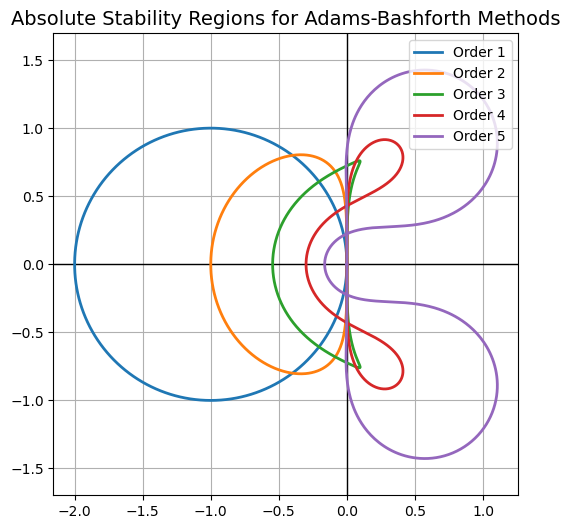

In [63]:
# Absolute Stability regions for Adams-Bashforth methods


import numpy as np
import matplotlib.pyplot as plt

p = 5  # Maximum order

xmin, xmax = -2.5, 0.5
ymin, ymax = -1.5, 1.5

n = 1000
theta = np.linspace(0, 2 * np.pi, n+1)

# Create figure
plt.figure(figsize=(6, 6))
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid(True)
plt.axis('equal')

# Title
plt.title('Absolute Stability Regions for Adams-Bashforth Methods', fontsize=14)

# Loop through different orders
for k in range(1, p+1):
    eitheta = np.exp(1j * theta)  # Precompute exp(i*theta)

    if k == 1:
        # AB1 (FE)
        z = eitheta - 1
    elif k == 2:
        # AB2
        z = (2 * eitheta * (eitheta - 1)) / (3 * eitheta - 1)
    elif k == 3:
        # AB3
        z = (12 * (eitheta**3 - eitheta**2)) / (5 - 16 * eitheta + 23 * eitheta**2)
    elif k == 4:
        # AB4
        z = (24 * (eitheta**4 - eitheta**3)) / (-9 + 37 * eitheta - 59 * eitheta**2 + 55 * eitheta**3)
    elif k == 5:
        # AB5
        z = (720 * (eitheta**5 - eitheta**4)) / (251 - 1274 * eitheta + 2616 * eitheta**2 - 2774 * eitheta**3 + 1901 * eitheta**4)
    #elif k == 6:
        # AB6
        #z = (5040 * (eitheta**6 - eitheta**5)) / (-475 + 2877 * eitheta - 7298 * eitheta**2 + 9982 * eitheta**3 - 7923 * eitheta**4 + 4277 * eitheta**5)

    plt.plot(z.real, z.imag, linewidth=2, label=f'Order {k}')

# Add legend
plt.legend(loc='best')
plt.show()



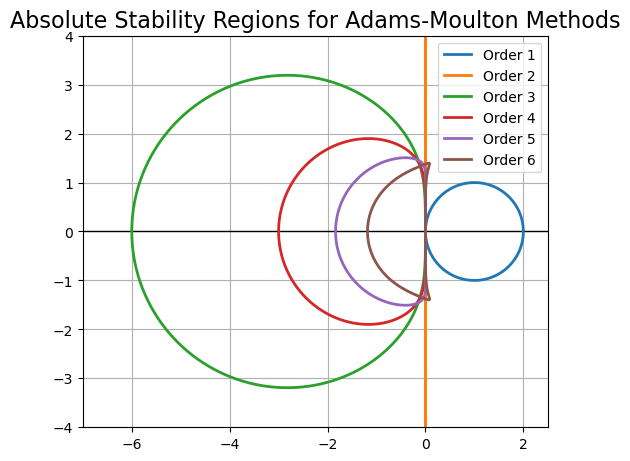

In [64]:

# Absolute Stability regions for Adams-Moulton methods

import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 6
xmin, xmax = -7, 2.5
ymin, ymax = -4, 4
n = 1000
theta = np.linspace(0, 2 * np.pi, n+1)

# Create the figure and axis
plt.figure(figsize=(6,6))
plt.axis('square')
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.grid(True)

# Title
plt.title('Absolute Stability Regions for Adams-Moulton Methods', fontsize=16)

# Loop for different methods
for k in range(1, p + 1):

    eitheta = np.exp(1j * theta)  # Precompute exp(i*theta)

    if k == 1:
        # Backward Euler
        z = (eitheta - 1) / eitheta

    elif k == 2:
        # 2nd order
        z = (2*(eitheta - 1)) / (eitheta + 1)

    elif k == 3:
        # 3rd order
        z = 12*(eitheta**2 - eitheta) / (5*eitheta**2 + 8*eitheta - 1)

    elif k == 4:
        # 4th order
        z = 24*(eitheta**3 - eitheta**2)/(9*eitheta**3 + 19*eitheta**2 - 5*eitheta + 1)

    elif k == 5:
        # 5th order
        z = 720*(eitheta**4 - eitheta**3)/(251*eitheta**4 + 646*eitheta**3 - 264*eitheta**2 + 106*eitheta - 19)

    elif k == 6:
        # 6th order
        z = 1440* (eitheta**5 - eitheta**4)/(475*eitheta**5 + 1427*eitheta**4 - 798*eitheta**3 + 482*eitheta**2 - 173*eitheta + 27)

    plt.plot(z.real, z.imag, linewidth=2, label=f'Order {k}')

# Display legend
plt.legend()

# Show the plot
plt.show()



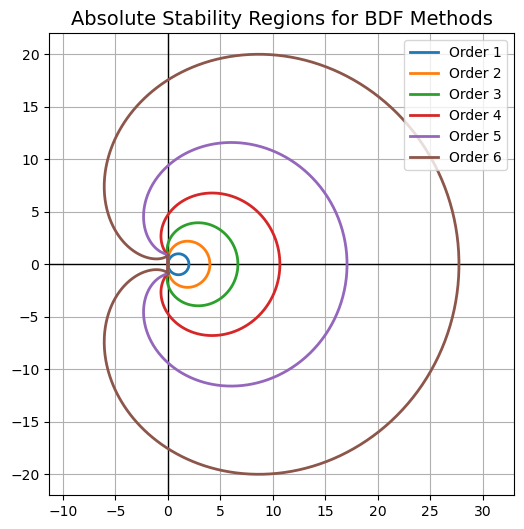

In [65]:

# Absolute Stability regions for Backward Differentiation Formulas (BDF)

import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 6  # Maximum order (up to BDF4)
n = 1000  # Number of points
theta = np.linspace(0, 2 * np.pi, n+1)  # Angles

# Create figure
plt.figure(figsize=(6, 6))
plt.axhline(0, color='k', linewidth=1)
plt.axvline(0, color='k', linewidth=1)
plt.grid(True)

# Title
plt.title('Absolute Stability Regions for BDF Methods', fontsize=14)

# Loop through different BDF orders
for k in range(1, p + 1):
    eitheta = np.exp(1j * theta)  # Precompute exp(i*theta)

    if k == 1:
        # BDF1 (Backward Euler)
        z = (eitheta - 1) / eitheta

    if k == 2:
        # BDF2
        z = (1 - 4*eitheta + 3*eitheta**2)/(2*eitheta**2)

    elif k == 3:
        # BDF3
        z = (-2 + 9*eitheta - 18*eitheta**2 + 11*eitheta**3) / (6*eitheta**3)

    elif k == 4:
        # BDF4
        z = (3 - 16*eitheta + 36*eitheta**2 - 48*eitheta**3 + 25*eitheta**4) / (12*eitheta**4)

    elif k == 5:
        # BDF5
        z = (-12 + 75*eitheta - 200*eitheta**2 + 300*eitheta**3 - 300*eitheta**4 + 137*eitheta**5) / (60*eitheta**5)

    elif k == 6:
        # BDF6
        z = (10 - 72*eitheta + 225*eitheta**2 - 400*eitheta**3 + 450*eitheta**4 - 360*eitheta**5 + 147*eitheta**6) / (60*eitheta**6)

    plt.plot(z.real, z.imag, linewidth=2, label=f'Order {k}')


plt.legend(loc='best')
plt.axis('equal')
plt.show()


# Systems of Differential Equations

For systems of differential equations $u' = A u$, the general solution is

$$
u(t) = e^{A t} u(0).
$$

The behavior of this solution depends on the eigenvalues of $A$. A necessary condition for absolute stability is that $z = k \lambda$ lies in the stability region for each eigenvalue $\lambda$ of $A$. To see this, suppose $A \in \mathbb{R}^{m \times m}$ is diagonalizable as $A = R \Lambda R^{-1}$. Then

$$
u' = A u = R \Lambda R^{-1} u.
$$

Let $v = R^{-1} u$. Then we obtain $m$ decoupled equations:

$$
v' = \Lambda v.
$$

If we use one method to solve the system, the time step $k$ must be chosen so that $k \lambda_p$ lies in the stability region for all $p = 1, \dots, m$.


## Stiffness
 
### What is stiffness?

In general a **stiff** ODE is one where $u'(t) \ll f'(t, u)$.  For systems of ODEs the **stiffness ratio**

$$\frac{\max_p |\lambda_p|}{\min_p |\lambda_p|}$$

can be used to characterize the stiffness of the system.  In our last example this ratio was $K_1 / K_2$ if $K_1 > K_2$.  As we increased this ratio we observed that the numerical method became unstable only a reduction in $\Delta t$ lead to stable solution again.  For explicit time step methods this is problematic as the reduction of the time step for only one of the species leads to very expensive evaluations.  For example, forward Euler has the stability criteria

$$|1 + \Delta t \lambda| < 1$$

where $\lambda$ will have to be the maximum eigenvalue of the system.  


-3.0
-1.0


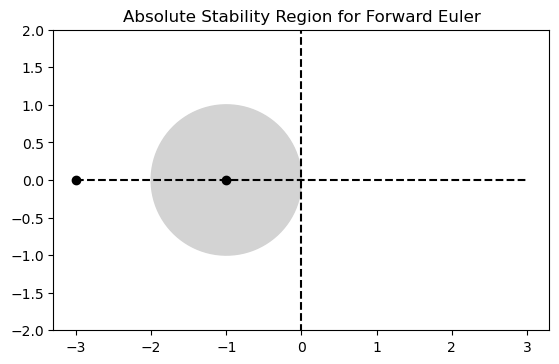

In [66]:

# Plot the region of absolute stability for Forward Euler
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

t = np.linspace(0.0, 2.0 * np.pi, 100)

K_1 = 3.0
K_2 = 1.0
delta_t = 1.0
eigenvalues = [-K_1, -K_2]

axes.fill(np.cos(t) - 1.0, np.sin(t), color='lightgray')
for lam in eigenvalues:
    print(lam * delta_t)
    axes.plot(lam * delta_t, 0.0, 'ko')
axes.plot([-3, 3],[0.0, 0.0],'k--')
axes.plot([0.0, 0.0],[-3, 3],'k--')
# axes.set_xlim((-3, 1))
axes.set_ylim((-2,2))
axes.set_aspect('equal')

axes.set_title("Absolute Stability Region for Forward Euler")
plt.show()


### A-Stability
What if we could expand the absolute stability region to encompass more of the left-half plane or even better, all of it.  A method that has this property is called **A-stable**.  We have already seen one example of this with backward Euler which has a stability region of

$$|1 - z| \geq 1$$

which covers the full left-half plane.  
It turns out that for linear multi-step methods a theorem by Dahlquist proves that there are no LMMs that satisfies the A-stability criterion beyond second order (trapezoidal rule).  There are higher-order Runge-Kutta methods do however.
Perhaps this is too restrictive though.  Often large eigenvalues for systems (for instance coming from a PDE discretization for the heat equation) lie completely on the real line.  If the stability region can encompass as much of the real line as possible while leaving out the rest of the left-half plane we can possibly get a more efficient method.  There are a number of methods that can be constructed that have this property but are higher-order.


-3.0
-1.0


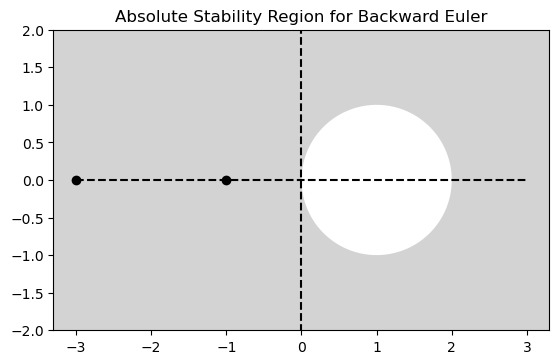

In [67]:

# Plot the region of absolute stability for Backward Euler
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

t = np.linspace(0.0, 2.0 * np.pi, 100)

K_1 = 3.0
K_2 = 1.0
delta_t = 1.0
eigenvalues = [-K_1, -K_2]

axes.set_facecolor('lightgray')
axes.fill(np.cos(t) + 1.0, np.sin(t), 'w')
for lam in eigenvalues:
    print(lam * delta_t)
    axes.plot(lam * delta_t, 0.0, 'ko')
axes.plot([-3, 3],[0.0, 0.0],'k--')
axes.plot([0.0, 0.0],[-3, 3],'k--')
# axes.set_xlim((-3, 1))
axes.set_ylim((-2,2))
axes.set_aspect('equal')

axes.set_title("Absolute Stability Region for Backward Euler")
plt.show()


### L-Stability

It turns out not all A-stable methods are alike.  Consider the backward Euler method and the trapezoidal method.  The stability polynomial for the trapezoidal method is
$$\begin{aligned}
    0 &= U_{n+1} - U_n - \Delta t \frac{1}{2} (\lambda U_n + \lambda U_{n+1}) \\
      &= U_{n+1}\left(1 - \frac{1}{2} \Delta t \lambda \right ) - U_n \left(1 + \frac{1}{2}\Delta t \lambda \right) \\
      &= \left(\xi - \frac{1 + \frac{1}{2}z}{1 - \frac{1}{2} z}\right) \left(1 - \frac{1}{2} z \right )\\
\end{aligned}$$
which shows that it is A-stable.  Lets apply both these methods to a problem we have seen before and see what happens.


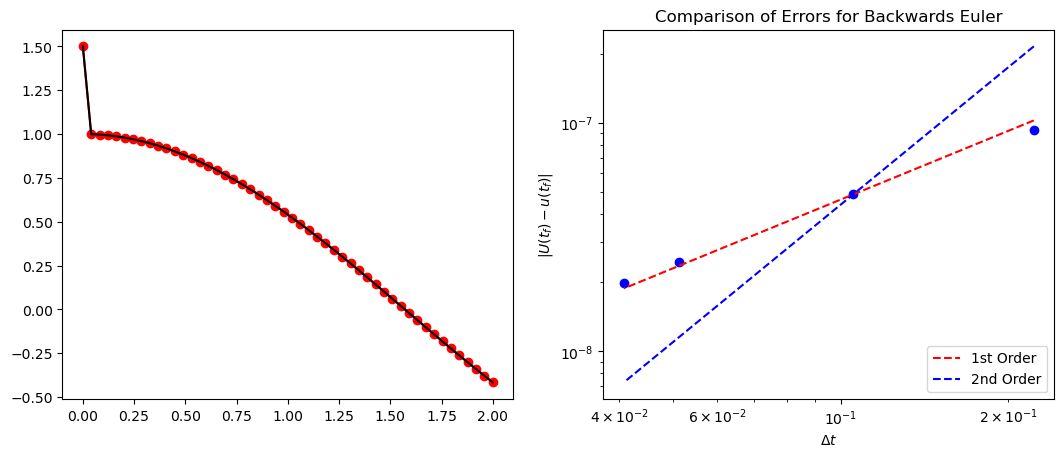

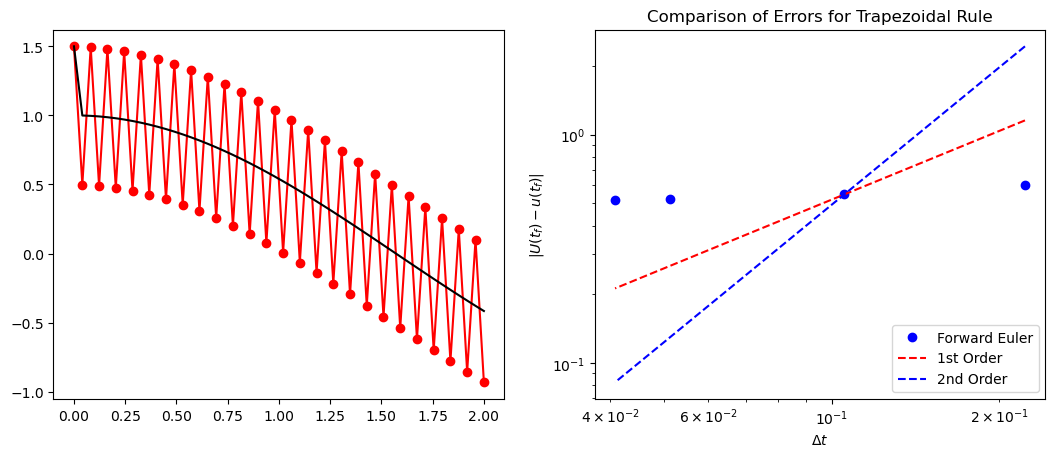

In [68]:
# Compare accuracy between Euler
f = lambda t, lam, u: lam * (u - np.cos(t)) - np.sin(t)
u_exact = lambda t_0, eta, lam, t: np.exp(lam * (t - t_0)) * (eta - np.cos(t_0)) + np.cos(t)

t_0 = 0.0
t_f = 2.0
eta = 1.5
lam = -1e6

num_steps = [10, 20, 40, 50]

delta_t = np.empty(len(num_steps))
error_euler = np.empty(len(num_steps))
error_trap = np.empty(len(num_steps))

for (i, N) in enumerate(num_steps):
    t = np.linspace(0, t_f, N)
    delta_t[i] = t[1] - t[0]
    u = u_exact(t_0, eta, lam, t_f)
    
    # Compute Euler solution
    U_euler = np.empty(t.shape)
    U_euler[0] = eta
    for (n, t_n) in enumerate(t[1:]):
        U_euler[n+1] = (U_euler[n] - lam * delta_t[i] * np.cos(t_n) - delta_t[i] * np.sin(t_n)) / (1.0 - lam * delta_t[i])
    error_euler[i] = np.abs(U_euler[-1] - u) / np.abs(u)
    
    # Compute using trapezoidal
    U_trap = np.empty(t.shape)
    U_trap[0] = eta
    for (n, t_n) in enumerate(t[1:]):
        U_trap[n+1] = (U_trap[n] + delta_t[i] * 0.5 * f(t_n, lam, U_trap[n]) - 0.5 * lam * delta_t[i] * np.cos(t_n) - 0.5 * delta_t[i] * np.sin(t_n)) / (1.0 - 0.5 * lam * delta_t[i])
    error_trap[i] = np.abs(U_trap[-1] - u)
    
# Plot error vs. delta_t
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 1)
axes.plot(t, U_euler, 'ro-')
axes.plot(t, u_exact(t_0, eta, lam, t),'k')

axes = fig.add_subplot(1, 2, 2)
axes.loglog(delta_t, error_euler, 'bo')
order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_euler[1], 1.0) * delta_t**1.0, 'r--', label="1st Order")
axes.loglog(delta_t, order_C(delta_t[1], error_euler[1], 2.0) * delta_t**2.0, 'b--', label="2nd Order")

axes.legend(loc=4)
axes.set_title("Comparison of Errors for Backwards Euler")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

# Plots for trapezoid
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1, 2, 1)
axes.plot(t, U_trap, 'ro-')
axes.plot(t, u_exact(t_0, eta, lam, t),'k')

axes = fig.add_subplot(1, 2, 2)
axes.loglog(delta_t, error_trap, 'bo', label='Forward Euler')
order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))
axes.loglog(delta_t, order_C(delta_t[1], error_trap[1], 1.0) * delta_t**1.0, 'r--', label="1st Order")
axes.loglog(delta_t, order_C(delta_t[1], error_trap[1], 2.0) * delta_t**2.0, 'b--', label="2nd Order")

axes.legend(loc=4)
axes.set_title("Comparison of Errors for Trapezoidal Rule")
axes.set_xlabel("$\Delta t$")
axes.set_ylabel("$|U(t_f) - u(t_f)|$")

plt.show()

It turns out that if we look at a one-step method and define the following ratio

$$U_{n+1} = R(z) U_n$$

we can define another form of stability, called **L-stability**, where we require that the method is A-stable and that

$$\lim_{z \rightarrow \infty} |R(z)| = 0.$$

Backwards Euler is L-stable while the trapezoidal method is not.


## One-step methods and $L$-stability

For one-step methods, we can write $U^{n+1} = R(z) U^n$:

$$
R_{BE}(z) = \frac{1}{1-z}, \qquad R_{TZ}(z) = \frac{1 + \frac{1}{2}z}{1 - \frac{1}{2}z}.
$$

- $\lim_{z \to \infty} |R_{BE}(z)| = 0$, which ensures fast transients are always damped.
- $\lim_{z \to \infty} |R_{TZ}(z)| = 1$, so the trapezoidal method may not fully damp fast transients.

**$L$-stability:** A one-step method is $L$-stable if it is $A$-stable and $\lim_{z \to \infty} |R(z)| = 0$.  

Backward differentiation formula (BDF) methods are effective for stiff problems. A second-order $L$-stable example is the TR-BDF2 method:

$$
\begin{aligned}
U^* &= U^n + \frac{k}{4}[f(U^n) + f(U^*)],\\
U^{n+1} &= \frac{1}{3}[4U^* - U^n + k f(U^{n+1})].
\end{aligned}
$$

The first stage is the trapezoidal method over step $k/2$, and the second stage is a two-step BDF update.

--- 

# Exercises

### **Exercise 1.**

Consider the initial value problem (IVP)  
$$
u' = \frac{u^2 + u}{t}, \quad 1 \le t \le 5, \quad u(1) = -2,
$$  
whose exact solution is  
$$
u(t) = \frac{2t}{1 - 2t}.
$$  

**Part A: Implementation**

Write a program (using a language like Python, MATLAB, or C++) to solve this IVP using the following **linear multistep methods (LMMs):**

1. **Adams-Bashforth 2-step (AB2)** – explicit LMM of order 2  
2. **Adams-Bashforth 4-step (AB4)** – explicit LMM of order 4  
3. **Adams-Moulton 2-step (AM2)** – implicit LMM of order 2  
4. **Backward Differentiation Formula 2-step (BDF2)** – implicit LMM of order 2  

For each method, initialize the required starting values:  

1. **Exact Initialization:** Assume the exact solution is known to generate the first few steps.  
2. **One-Step Initialization:** Use a one-step method consistent with the method’s order (e.g., Forward Euler for AB2, RK2 for AB4) to generate the starting values.

**Part B: Convergence Analysis**

Analyze the **convergence** of each method by comparing the numerical solution against the exact solution $u(t)$ at the final time $t = 5$. Use a sequence of step sizes:  
$$
\Delta t_m = \frac{0.2}{2^m}, \quad m = 0, 1, \dots, 6.
$$

The exact value at $t = 5$ is  
$$
u(5) = \frac{2 \cdot 5}{1 - 2 \cdot 5} = -\frac{10}{9}.
$$

**Required Deliverables:**

1. **Tabular Results:** For each method, present a table showing $\Delta t_m$, the absolute error  
   $$
   \mathcal{E}(\Delta t_m) = \left| U^N(\Delta t_m) - u(5) \right|,
   $$  
   and the **estimated order of convergence** $p$ between consecutive step sizes.  
2. **Log-Log Plot:** Generate a single log-log plot showing the absolute error $\mathcal{E}$ versus the step size $\Delta t$ for all four methods.

---

**Exercise 2**  
Using an appropriate form of an interpolating polynomial, derive:

1. The Adams-Bashforth two-step method.  
2. The two-step Adams-Moulton formula:  
$$
U^{n+2} = U^{n+1} + \frac{k}{12} \left(5 f(U^{n+2}) + 8 f(U^{n+1}) - f(U^n)\right),
$$  
and determine its local truncation error.

---

**Exercise 3**  
The leapfrog method for the ODE $y' = f(t,y)$ uses centered differencing:  
$$
\frac{y_{i+1} - y_{i-1}}{2h} = f(t_i, y_i).
$$  
Show that this is an explicit linear two-step method, second-order accurate, and does not belong to the Adams or BDF families.

---

**Exercise 4**  
Determine which of the following linear multistep methods are convergent. For those that are not, identify if they are inconsistent, not zero-stable, or both:

1. $U^{n+2} = 3 U^{n+1} - 2 U^n - k F^n$  
2. $U^{n+2} = 2 U^{n+1} - U^n + \frac{k}{2} (F^{n+2} - F^n)$  
3. $U^{n+3} = 2 U^{n+2} - \frac{5}{4} U^{n+1} + \frac{1}{4} U^n + \frac{1}{4} k f(U^n)$  
4. $U^{n+2} = -4 U^{n+1} + 5 U^n + 4 k F^{n+1} + 2 k F^n$  
5. $U^{n+2} = \frac{1}{2} U^{n+1} + \frac{1}{2} U^n + 2 k F^{n+1}$

---

**Exercise 5**  

1. Determine the general solution to the linear difference equation:  
$$
2 U^{n+3} - 5 U^{n+2} + 4 U^{n+1} - U^n = 0.
$$  
**Hint:** One root of the characteristic polynomial is $\xi = 1$.

2. Solve this difference equation with initial values $U^0 = 11$, $U^1 = 5$, $U^2 = 1$. What is $U^{10}$?

3. Consider the LMM:  
$$
2 U^{n+3} - 5 U^{n+2} + 4 U^{n+1} - U^n = k (\beta_0 f(U^n) + \beta_1 f(U^{n+1})).
$$  
Determine $\beta_0$ and $\beta_1$ such that the local truncation error is $O(k^2)$.

4. Using these $\beta_0$ and $\beta_1$, is the method convergent?

---

**Exercise 6**  
A general $r$-step LMM for $y' = f(x,y), \; y(x_0) = Y_0$ is:  
$$
y_{n+r} = \sum_{j=0}^{r-1} \alpha_j y_{n+j} + k \sum_{j=0}^{r} \beta_j f(x_{n+j}, y_{n+j}).
$$

1. Find all second-order two-step methods (conditions on $\alpha_j$ and $\beta_j$).  
2. For the explicit case ($\beta_r = 0$), obtain the one-parameter family of methods depending on $\alpha_1$, and determine the $\alpha_1$ values for which the method is stable.

---

**Exercise 7**  
Consider the method:  
$$
y_{n+1} = y_n + \frac{k}{2} (y_n' + y_{n+1}') + \frac{k^2}{12} (y_n'' - y_{n+1}''), \quad n \ge 0,
$$  
with $y_n' = f(x_n, y_n)$ and  
$$
y_n'' = \frac{\partial f(x_n, y_n)}{\partial x} + f(x_n, y_n) \frac{\partial f(x_n, y_n)}{\partial y}.
$$

1. Show that this is a fourth-order method.  
2. Show that the region of absolute stability contains the entire negative real axis of the complex $k \lambda$-plane.

---

**Exercise 8**  
Write a script to plot the absolute stability regions for:

1. Adams-Bashforth formulas of orders 1–4.  
2. Backward differentiation formulas of orders 1–3.  
3. Adams-Moulton formulas of orders 1–4.
